# ASSIGNMENT 01

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [ ]:
#importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#loading the dataset

df = pd.read_csv("C://Users//91772//Desktop//ML assigns//uber.csv")

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.shape

(200000, 9)

# 1.Pre-process the dataset.

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
#dropping rows with missing values

df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
#dropping unwanted columns

df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.drop(labels='key',axis=1,inplace=True)

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# 2. Identify outliers.

OUTLIER: An object that deviates significantly from the rest of the objects.

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

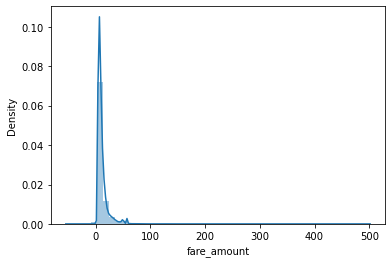

In [ ]:
# data visualization
# plotting distribution plot

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.distplot(df['fare_amount'])

<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

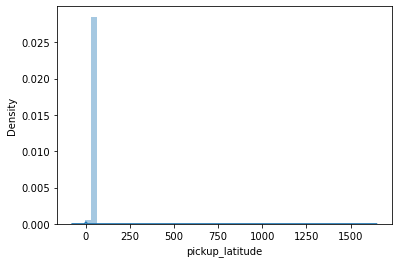

In [ ]:
sns.distplot(df['pickup_latitude'])

<AxesSubplot:xlabel='pickup_longitude', ylabel='Density'>

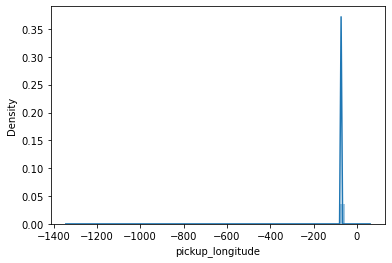

In [ ]:
sns.distplot(df['pickup_longitude'])

<AxesSubplot:xlabel='dropoff_longitude', ylabel='Density'>

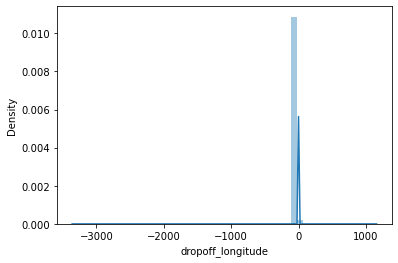

In [ ]:
sns.distplot(df['dropoff_longitude'])

<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

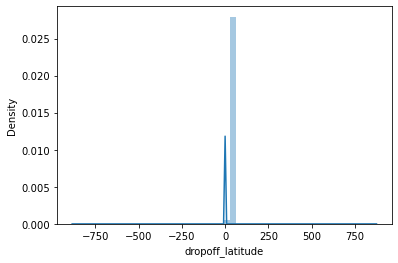

In [ ]:
sns.distplot(df['dropoff_latitude'])

In [ ]:
#creating a function to identify outliers

def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
#getting outlier details for column "fair_amount" using the above function

outliers = find_outliers_IQR(df["fare_amount"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 17166
max outlier value: 499.0
min outlier value: -52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [ ]:
#you can also pass two columns as argument to the function (here "passenger_count" and "fair_amount")

outliers = find_outliers_IQR(df[["passenger_count","fare_amount"]])
outliers

,passenger_count,fare_amount
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN
...,...,...
199995,NaN,NaN
199996,NaN,NaN
199997,NaN,30.9
199998,NaN,NaN


In [ ]:
#upper and lower limit which can be used for capping of outliers

upper_limit = df['fare_amount'].mean() + 3*df['fare_amount'].std()
print(upper_limit)
lower_limit = df['fare_amount'].mean() - 3*df['fare_amount'].std()
print(lower_limit)

41.06517154774204
-18.3453884488253


# 3. Check the correlation.

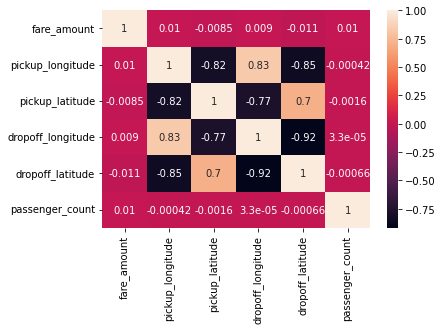

In [ ]:
#creating a correlation matrix

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#splitting column "pickup_datetime" into 5 columns: "day", "hour", "month", "year", "weekday"
#for a simplified view

import calendar
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['year']=df['pickup_datetime'].apply(lambda x:x.year)
df['weekday']=df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

df.drop(['pickup_datetime'],axis =1 , inplace = True)

AttributeError: 'str' object has no attribute 'day'

In [ ]:
#label encoding (categorical to numerical)

df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

In [ ]:
#independent variables (x)

x=df.drop("fare_amount", axis=1)
x

In [ ]:
#dependent variable (y)

y=df["fare_amount"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
x_train.head()

In [ ]:
x_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.


In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

In [ ]:
predictedvalues = lrmodel.predict(x_test)

In [ ]:
#Calculating the value of RMSE for Linear Regression

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

In [ ]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [ ]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [ ]:
#Calculating the value of RMSE for Random Forest Regression

rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

In [ ]:
rfrmodel_pred.shape

# Predict the price of the Uber ride

In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/piyushpandey758/Uber-Fare-Prediction/master/testt.csv")

In [ ]:
test.head()

In [ ]:
test.drop(test[['Unnamed: 0.1.1','Unnamed: 0','Unnamed: 0.1','key']],axis=1,inplace=True)

In [ ]:
test.isnull().sum()

In [ ]:
#converting datatype of column "pickup_datetime" from object to DateTime

test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [ ]:
#splitting column "pickup_datetime" into 5 columns: "day", "hour", "month", "year", "weekday"
#for a simplified view
#label encoding weekdays

test['day']=test['pickup_datetime'].apply(lambda x:x.day)
test['hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['month']=test['pickup_datetime'].apply(lambda x:x.month)
test['year']=test['pickup_datetime'].apply(lambda x:x.year)
test['weekday']=test['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

test.weekday = test.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

test.drop(['pickup_datetime'], axis = 1, inplace = True)

test.head(5)

In [ ]:
#Prediction!

rfrmodel_pred= rfrmodel.predict(test)

In [ ]:
df_pred = pd.DataFrame(rfrmodel_pred)
df_pred

In [ ]:
#to_csv() function exports the DataFrame to CSV format

df_pred.to_csv('pred.csv')